<a href="https://colab.research.google.com/github/EricoCoutoJr/Airbnb-Rio-de-Janeiro/blob/main/Analisando_os_Dados_do_Airbnb_(Rio_de_Janeiro).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Projeto Atualizado sobre os Dados do Airbnb
*by [Erico Couto Jr.](https://www.linkedin.com/in/ericocoutojr/)

---

# Análise dos Dados do Airbnb - Rio de Janeiro
<center><img alt="Analisando Airbnb" width="50%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>
O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.



**Neste *notebook*, iremos analisar os dados referentes à cidade do Rio de Janeiro, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Rio de Janeiro (good for visualisations).*


In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-12-23/visualisations/listings.csv")

## Análise dos Dados



**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Abaixo segue a visualização das 5 primeiras linhas do Dataset

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,500,5,259,2020-12-26,2.03,1,0
1,25026,Beautiful Modern Decorated Studio in Copa,3746246,Ghizlane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,160,7,238,2020-02-15,1.85,11,335
2,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,259,2,181,2020-03-15,2.07,1,267
3,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98127,-43.19046,Entire home/apt,157,3,346,2020-12-20,2.78,1,89
4,41198,"Modern 2bed,Top end of Copacabana",178975,Nicky,NaN,Copacabana,-22.97962,-43.19230,Entire home/apt,1035,3,18,2016-02-09,0.19,2,365


### **Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui e quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`.

In [4]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 25784
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase metade das linhas.
* As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.385200
last_review                       0.385200
name                              0.001125
host_name                         0.000310
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Qual o tipo de distribuição das variáveis?** 

VAmos plotar os histogramas para visualizar a distribuição dos dados.

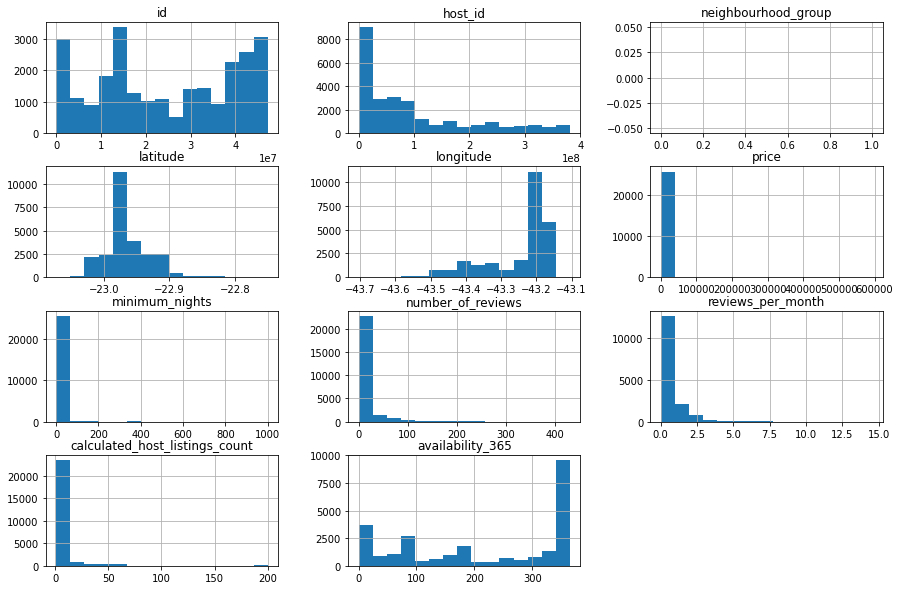

In [6]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [4]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,25784.000000,25784.000000,25784.000000,15852.000000,25784.000000,25784.000000
mean,879.820664,4.767491,11.960479,0.590130,6.582532,215.296114
std,5179.764367,19.042074,29.371931,0.819468,19.995586,140.893876
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,200.000000,1.000000,0.000000,0.100000,1.000000,83.000000
50%,380.000000,2.000000,1.000000,0.240000,1.000000,247.000000
75%,776.000000,4.000000,9.000000,0.780000,3.000000,359.000000
max,593266.000000,1000.000000,431.000000,14.550000,200.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 776, porém seu valor máximo é 593266.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.


#### Boxplot para minimum_nights


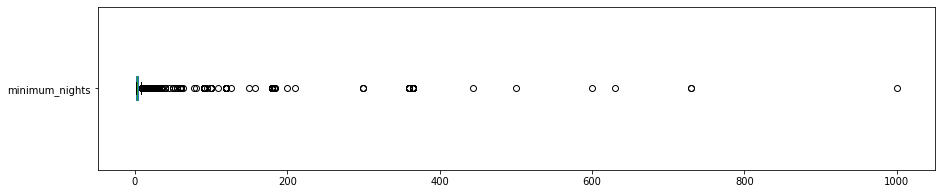

minimum_nights: valores acima de 30:
199 entradas
0.7718%


In [5]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False,figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))



#### Boxplot para price

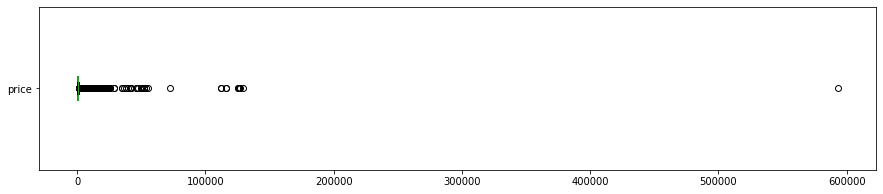


price: valores acima de R$1500
2455 entradas
9.5214%


In [9]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de R$1500 para price
print("\nprice: valores acima de R$1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))


#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

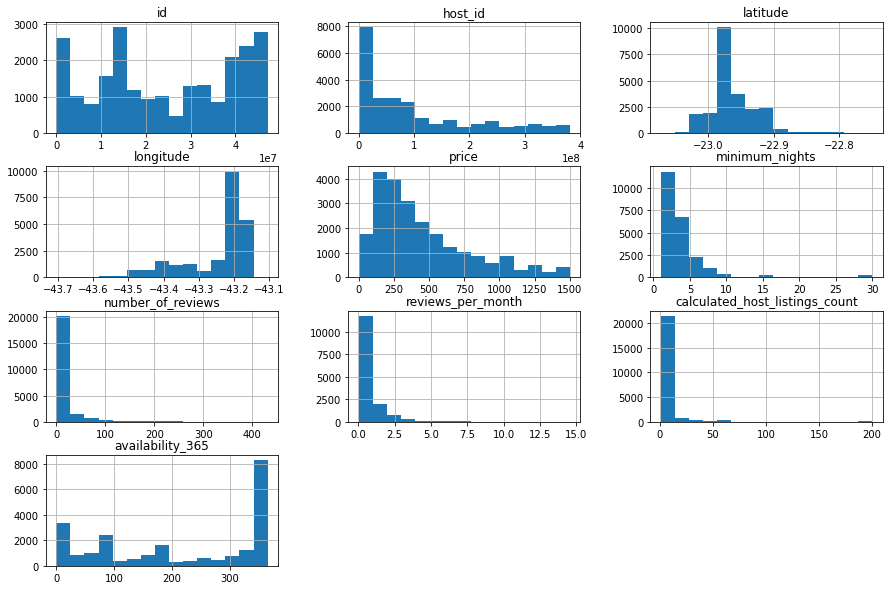

In [6]:
# remover os *outliers* em um novo DataFrame
# copiando o df em df_clean
df_clean = df.copy()

# limpando os "outliers" do dataframe df_clean
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));


### **Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [7]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.093798,-0.079755,-0.075201,0.171244,0.049127
minimum_nights,0.093798,1.000000,-0.069582,-0.102222,-0.029608,-0.002706
number_of_reviews,-0.079755,-0.069582,1.000000,0.644582,-0.034952,-0.076313
reviews_per_month,-0.075201,-0.102222,0.644582,1.000000,0.003108,-0.154244
calculated_host_listings_count,0.171244,-0.029608,-0.034952,0.003108,1.000000,0.008742
availability_365,0.049127,-0.002706,-0.076313,-0.154244,0.008742,1.000000


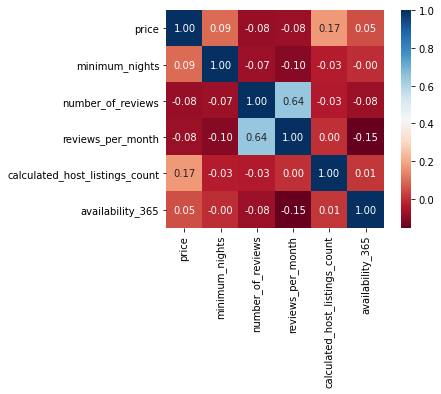

In [8]:
# Mesta linha iremos criar um grafico de correlação usando o framework 'seaborn' como 'sns'
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [9]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    16201
Private room        6268
Shared room          579
Hotel room           105
Name: room_type, dtype: int64

In [10]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.699737
Private room       0.270721
Shared room        0.025008
Hotel room         0.004535
Name: room_type, dtype: float64

### **Qual a localidade mais cara do Rio?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [11]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Vista Alegre    1262.000000
Grumari         1003.000000
Cavalcanti       925.000000
Anchieta         800.000000
Vaz Lobo         797.000000
Cacuia           795.000000
Osvaldo Cruz     780.000000
Leblon           650.875000
Ipanema          599.598925
Lagoa            593.735577
Name: price, dtype: float64

Acima, vemos que bairros como Vista Alegre, Grumari, Cavalcanti, Anchieta, Cacuia, Vaz Lobo e Osvaldo Cruz, estão com média de preço superior a de lugares como Leblon, Barra da Tijuca e Lagoa.

Uma pessoa que não conhecesse o Rio poderia apresentar esses resultados sem se questionar. Só para dar um único exemplo de como uma amostra pode ser não-representativa, veja quantas entradas há para o Vista Alegre ou Anchieta.

In [14]:
print(df_clean.neighbourhood.value_counts()[df_clean.neighbourhood.value_counts()<5])

# ver quantidade de imóveis no Zumbi e Anchieta
print(df_clean[df_clean.neighbourhood == "Zumbi"].shape)
print(df_clean[df_clean.neighbourhood == "Anchieta"].shape)

# ver as 2 entradas do Complexo do Alemão
df_clean[df_clean.neighbourhood == "Complexo do Alemão"]

Vicente de Carvalho     4
Jardim Carioca          4
Cidade Universitária    4
Pavuna                  4
Senador Vasconcelos     4
Jacaré                  4
Sepetiba                4
Praia da Bandeira       4
Parque Anchieta         4
Galeão                  4
Barros Filho            3
Freguesia (Ilha)        3
Rocha Miranda           3
Moneró                  3
Pitangueiras            3
Engenho da Rainha       3
Vila Militar            3
Ribeira                 3
Grumari                 2
Cacuia                  2
Bancários               2
Cordovil                2
Deodoro                 2
Cavalcanti              2
Complexo do Alemão      2
Manguinhos              2
Vaz Lobo                2
Vigário Geral           2
Vista Alegre            1
Anchieta                1
Maré                    1
Água Santa              1
Zumbi                   1
Gericinó                1
Acari                   1
Magalhães Bastos        1
Vila Kosmos             1
Honório Gurgel          1
Name: neighb

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
10960,17148972,Casa Brota,101966262,Thamyra,Complexo do Alemão,-22.85714,-43.27517,Private room,140,1,6,2018-10-07,0.13,1,90
12208,21448656,Casa 1 quarto alem,155642978,Felipe,Complexo do Alemão,-22.86109,-43.27705,Shared room,900,1,1,2017-11-28,0.03,1,365


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

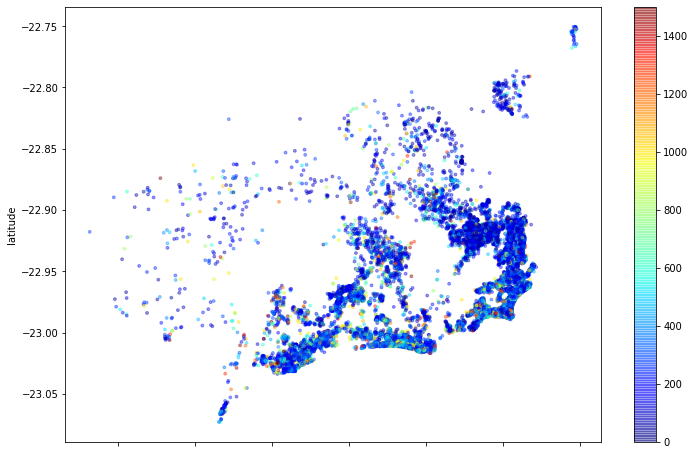

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.